# Soccer Data Analysis Project

## Purpose
The purpose of this project is to analyze soccer statistics from Wikipedia. The analysis includes scraping historical data about Champions League winners by country, players with the most international caps, the countries with the most world cup wins, and Ballon d'Or winners.
## Zachary Kruse
### 4/8/2025
 

# Work cited
https://www.w3schools.com/python/pandas/default.asp
https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp
https://www.w3schools.com/python/matplotlib_intro.asp
https://stackoverflow.com/questions/77433823/web-scraping-from-wikipedia-into-pandas
https://seaborn.pydata.org/tutorial/color_palettes.html

In [27]:
# import everything
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

## This extracts the first table from the list of DataFrames, which contains the details about the World Cup finals. Then, selects the "Winners" column, which contains the names of the countries that won each World Cup.


C:\Users\zdog6\AppData\Local\Temp\ipykernel_1248\679339174.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wins, x='World Cup Wins', y='Country', palette = "flare")


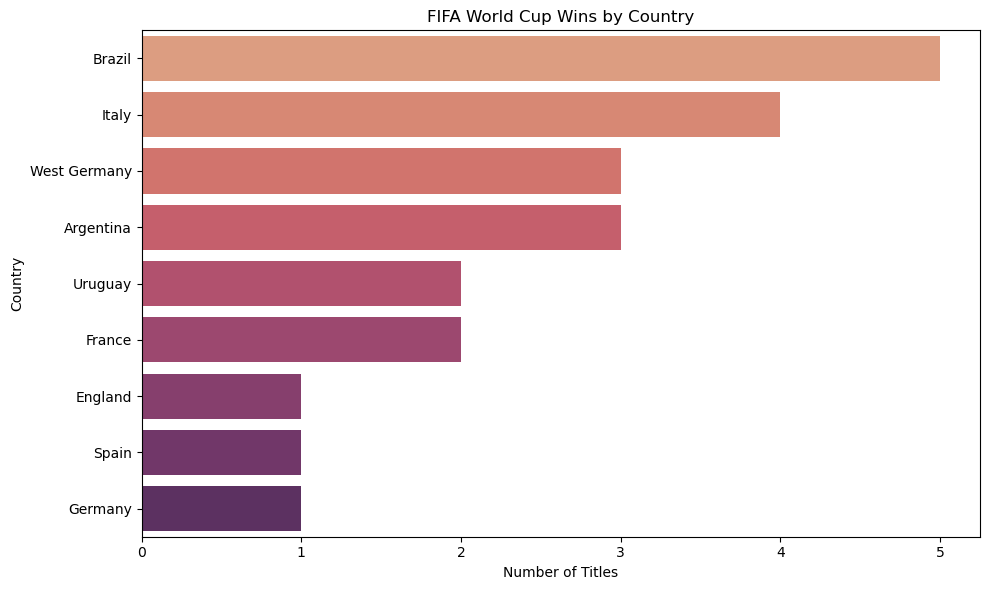

In [34]:
# Scrape the table
url_wc = "https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_finals"
tables_wc = pd.read_html(url_wc, match="Year")
df_wc = tables_wc[0]

# sort the data
wins = df_wc['Winners'].value_counts().reset_index()
wins.columns = ['Country', 'World Cup Wins']

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=wins, x='World Cup Wins', y='Country', palette = "flare")

# Add styling
plt.title("FIFA World Cup Wins by Country")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## This groups the df_ballon_dor DataFrame by the Country column. For each country, it counts how many Ballon d'Or wins there are and displays it. 

C:\Users\zdog6\AppData\Local\Temp\ipykernel_1248\3623254348.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clubs, x='Wins', y='Club', palette = "rocket")


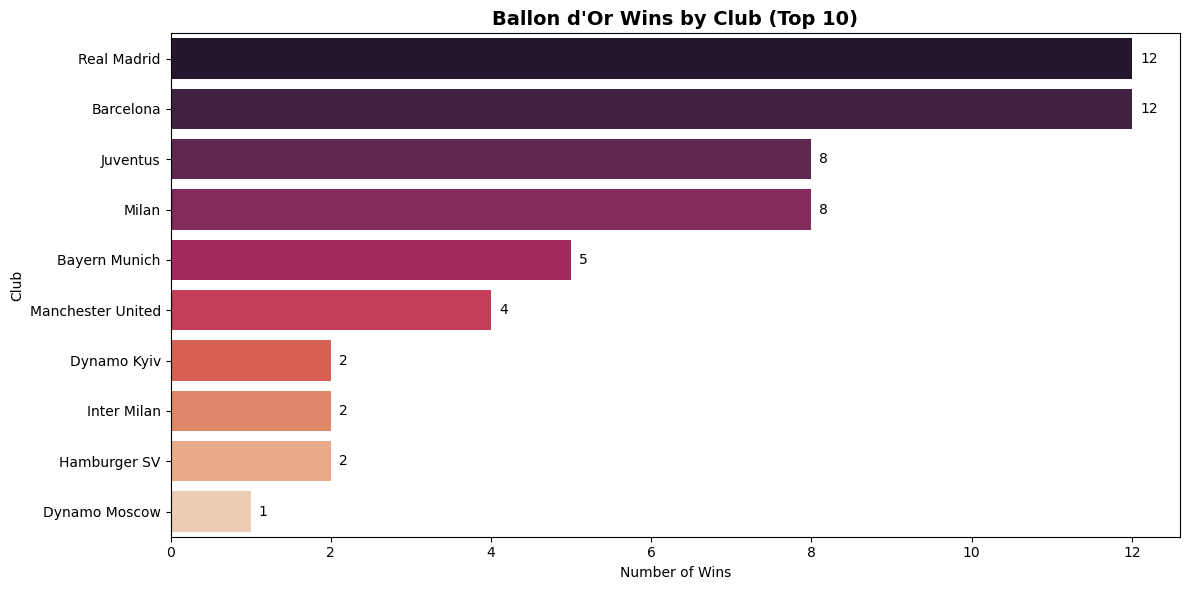

In [35]:
# Scrape the table
url = "https://en.wikipedia.org/wiki/Ballon_d%27Or"
tables = pd.read_html(url)

# Table 6 contains the club stats
df_clubs = tables[6].copy()

# Clean and sort the data
df_clubs['Wins'] = pd.to_numeric(df_clubs['Wins'], errors='coerce')
df_clubs = df_clubs.dropna(subset=['Wins'])
df_clubs = df_clubs.sort_values(by='Wins', ascending=False).head(10)

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clubs, x='Wins', y='Club', palette = "rocket")

# Add styling
plt.title("Ballon d'Or Wins by Club (Top 10)", fontsize=14, weight='bold')
plt.xlabel("Number of Wins")
plt.ylabel("Club")

# Add data labels
for index, value in enumerate(df_clubs['Wins']):
    plt.text(value + 0.1, index, str(int(value)), va='center')

plt.tight_layout()
plt.show()

## This code scrapes the list of footballers with 100+ international caps. The table is cleaned by renaming columns and sorting by international caps.

In [36]:
# Scrape the table
url_caps = "https://en.wikipedia.org/wiki/List_of_men%27s_footballers_with_100_or_more_international_caps"
tables_caps = pd.read_html(url_caps)
df_caps = tables_caps[1]
# Rename columns
df_caps = df_caps.rename(columns={"Players": "Name"})

# Sort by international caps in descending order
df_caps_sorted = df_caps[["Name", "Caps"]].sort_values(by="Caps", ascending=False)


# Reset the index and display the top 10 players
df_caps_sorted = df_caps_sorted.head(10).reset_index(drop=True)

# Display the top 10 most caps
df_caps_sorted

,Name,Caps
0,Cristiano Ronaldo,219
1,Bader Al-Mutawa,196
2,Soh Chin Ann[a],195
3,Lionel Messi,191
4,Luka Modrić,186
5,Ahmed Hassan,184
6,Hassan Al-Haydos,183
7,Ahmed Mubarak,183
8,Andrés Guardado[b],180
9,Sergio Ramos,180


## The table was processed to extract relevant information and group clubs by country.


C:\Users\zdog6\AppData\Local\Temp\ipykernel_1248\3794077349.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champions['Country'] = df_champions['Winners'].map(club_to_country)


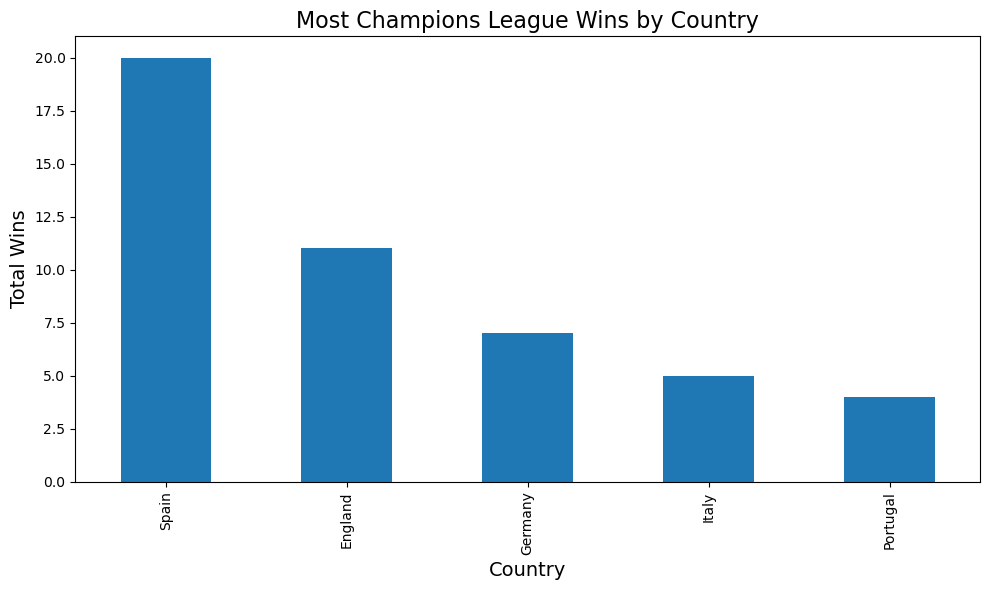

In [38]:
# Scrape the table
url_champions = "https://en.wikipedia.org/wiki/List_of_European_Cup_and_UEFA_Champions_League_finals"
tables_champions = pd.read_html(url_champions)

# Extract the relevant table
df_champions = tables_champions[1]
df_champions = df_champions[['Season', 'Winners']]

# Map clubs to countries
club_to_country = {
    'Real Madrid': 'Spain', 'Barcelona': 'Spain', 'Atletico Madrid': 'Spain',
    'Bayern Munich': 'Germany', 'Liverpool': 'England', 'Manchester United': 'England',
    'AC Milan': 'Italy', 'Juventus': 'Italy', 'Chelsea': 'England', 'Inter Milan': 'Italy',
    'Paris Saint-Germain': 'France', 'Benfica': 'Portugal', 'Porto': 'Portugal'
    
}

# Map the clubs to their countries
df_champions['Country'] = df_champions['Winners'].map(club_to_country)

# Count the total number of wins by country
df_country_wins = df_champions['Country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
df_country_wins.sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.title("Most Champions League Wins by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Wins", fontsize=14)
plt.tight_layout()
plt.show()